## 03.00-Introduction-to-Pandas

In [1]:
import pandas
pandas.__version__
import pandas as pd

## 03.01-Introducing-Pandas-Objects

In [2]:
import numpy as np
import pandas as pd

data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

data.values

data.index

data[1]

data[1:3]

data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

data['b']

data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

data[5]

population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

population['California']

population['California':'Illinois']

pd.Series([2, 4, 6])

pd.Series(5, index=[100, 200, 300])

pd.Series({2:'a', 1:'b', 3:'c'})

pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

states = pd.DataFrame({'population': population,
                       'area': area})
states

states.index

states.columns

states['area']

pd.DataFrame(population, columns=['population'])

data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

pd.DataFrame({'population': population,
              'area': area})

pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

pd.DataFrame(A)

ind = pd.Index([2, 3, 5, 7, 11])
ind

ind[1]

ind[::2]

print(ind.size, ind.shape, ind.ndim, ind.dtype)

#ind[1] = 0

indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

indA & indB  # intersection

indA | indB  # union

indA ^ indB  # symmetric difference

5 (5,) 1 int64


Index([3, 0, 0, 0, 2], dtype='int64')

## 03.03-Operations-in-Pandas

In [3]:
import pandas as pd
import numpy as np

rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

np.exp(ser)

np.sin(df * np.pi / 4)

area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

population / area

#area.index | population.index

A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

A.add(B, fill_value=0)

A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

A + B

fill = A.stack().mean()
A.add(B, fill_value=fill)

A = rng.randint(10, size=(3, 4))
A

A - A[0]

df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

df.subtract(df['R'], axis=0)

halfrow = df.iloc[0, ::2]
halfrow

df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


## 03.04-Missing-Values

In [4]:
import numpy as np
import pandas as pd

vals1 = np.array([1, None, 3, 4])
vals1

for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

#vals1.sum()

vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

1 + np.nan

0 *  np.nan

vals2.sum(), vals2.min(), vals2.max()

np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

pd.Series([1, np.nan, 2, None])

x = pd.Series(range(2), dtype=int)
x

x[0] = None
x

data = pd.Series([1, np.nan, 'hello', None])

data.isnull()

data[data.notnull()]

data.dropna()

df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

df.dropna()

df.dropna(axis='columns')

df[3] = np.nan
df

df.dropna(axis='columns', how='all')

df.dropna(axis='rows', thresh=3)

data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

data.fillna(0)

# forward-fill
data.fillna(method='ffill')

# back-fill
data.fillna(method='bfill')

df

df.fillna(method='ffill', axis=1)

dtype = object
21.4 ms ± 191 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
473 μs ± 3.46 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_944/1206536951.py:63: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill')
/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_944/1206536951.py:66: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill')
/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_944/1206536951.py:70: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=1)


,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


## 03.05-Hierarchical-Indexing

In [5]:
import pandas as pd
import numpy as np

index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

pop[('California', 2010):('Texas', 2000)]

pop[[i for i in pop.index if i[1] == 2010]]

index = pd.MultiIndex.from_tuples(index)
index

pop = pop.reindex(index)
pop

pop[:, 2010]

pop_df = pop.unstack()
pop_df

pop_df.stack()

pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

#pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
#              labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

pop.index.names = ['state', 'year']
pop

# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

health_data['Guido']

pop

pop['California', 2000]

pop['California']

pop.loc['California':'New York']

pop[:, 2000]

pop[pop > 22000000]

pop[['California', 'Texas']]

health_data

health_data['Guido', 'HR']

health_data.iloc[:2, :2]

health_data.loc[:, ('Bob', 'HR')]

#health_data.loc[(:, 1), (:, 'HR')]

idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

data = data.sort_index()
data

data['a':'b']

pop.unstack(level=0)

pop.unstack(level=1)

pop.unstack().stack()

pop_flat = pop.reset_index(name='population')
pop_flat

pop_flat.set_index(['state', 'year'])

health_data

#data_mean = health_data.mean(level='year')
#data_mean

#data_mean.mean(axis=1, level='type')

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      30.0  37.2  34.0  37.7  34.0  35.7
     2      25.0  36.8  24.0  34.7  50.0  36.5
2014 1      43.0  36.3  37.0  36.6  29.0  36.8
     2      39.0  36.6  25.0  35.8  40.0  35.2

## 03.06-Concat-And-Append

In [6]:
import pandas as pd
import numpy as np

def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    #def _repr_html_(self):
    #    return '\n'.join(self.template.format(a, eval(a)._repr_html_())
    #                     for a in self.args)
    
    #def __repr__(self):
    #    return '\n\n'.join(a + '\n' + repr(eval(a))
    #                       for a in self.args)
    

x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='col')")

x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

display('df5', 'df6',
        "pd.concat([df5, df6], join_axes=[df5.columns])")

display('df1', 'df2', 'df1.append(df2)')

ValueError: Indexes have overlapping values: Index([0, 1], dtype='int64')


## 03.07-Merge-and-Join

In [7]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

df3 = pd.merge(df1, df2)
df3

df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

display('df1a', 'df2a', 'df1a.join(df2a)')

display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

pd.merge(df6, df7, how='inner')

display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

# Following are shell commands to download the data
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
#merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

merged.isnull().any()

merged[merged['population'].isnull()].head()

merged.loc[merged['state'].isnull(), 'state/region'].unique()

merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

final = pd.merge(merged, areas, on='state', how='left')
final.head()

final.isnull().any()

final['state'][final['area (sq. mi)'].isnull()].unique()

final.dropna(inplace=True)
final.head()

data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

density.sort_values(ascending=False, inplace=True)
density.head()

density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## 03.08-Aggregation-and-Grouping

In [8]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

planets.head()

rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

ser.sum()

ser.mean()

df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

df.mean()

df.mean(axis='columns')

planets.dropna().describe()

df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

df.groupby('key')

df.groupby('key').sum()

planets.groupby('method')

planets.groupby('method')['orbital_period']

planets.groupby('method')['orbital_period'].median()

for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

planets.groupby('method')['year'].describe().unstack()

rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

df.groupby('key').aggregate(['min', np.median, max])

df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df.groupby('key').transform(lambda x: x - x.mean())

def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

display('df', "df.groupby(df['key']).sum()")

df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

display('df2', 'df2.groupby(str.lower).mean()')

df2.groupby([str.lower, mapping]).mean()

decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_944/1693142293.py:70: FutureWarning: The provided callable <function median at 0x1079ce5c0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('key').aggregate(['min', np.median, max])
/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_944/1693142293.py:70: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('key').aggregate(['min', np.median, max])


decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## 03.09-Pivot-Tables

/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_944/1310252685.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()
/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_944/1310252685.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class')
/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_944/1310252685.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warni

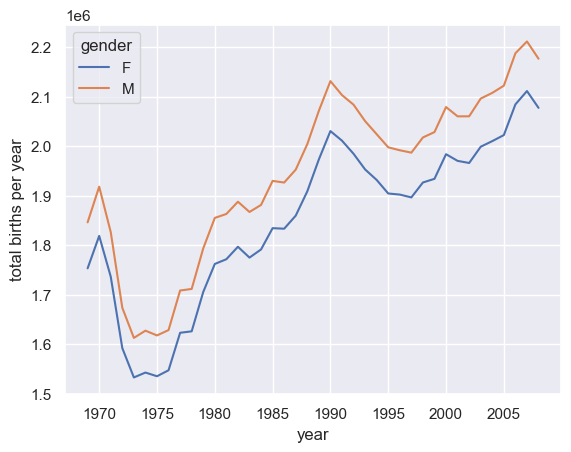

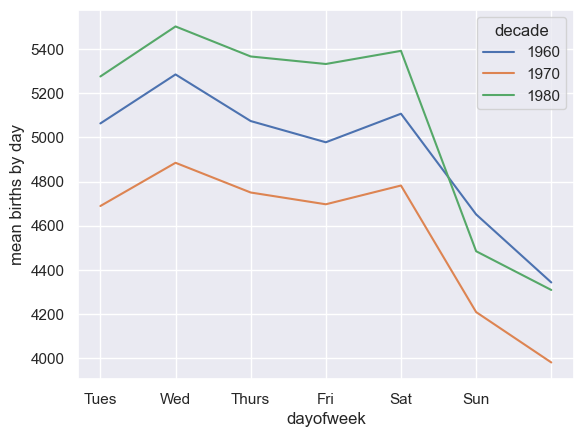

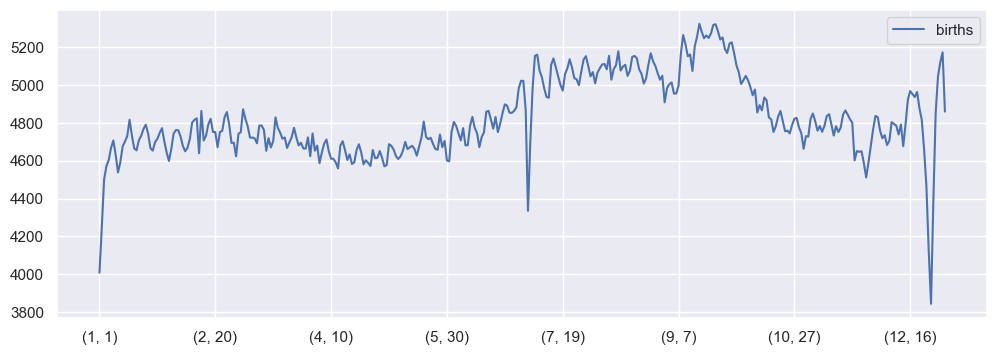

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

titanic.head()

titanic.groupby('sex')[['survived']].mean()

titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

titanic.pivot_table('survived', index='sex', columns='class')

age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

titanic.pivot_table('survived', index='sex', columns='class', margins=True)

# shell command to download the data:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

births = pd.read_csv('data/births.csv')

births.head()

births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

#births_by_date.index = [pd.datetime(2012, month, day)
#                        for (month, day) in births_by_date.index]
births_by_date.head()

# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

## 03.10-Working-With-Strings.ipynb

In [18]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

data = ['peter', 'Paul', 'MARY', 'gUIDO']
#[s.capitalize() for s in data]

data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
#[s.capitalize() for s in data]

import pandas as pd
names = pd.Series(data)
names

names.str.capitalize()

monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

monte.str.lower()

monte.str.len()

monte.str.startswith('T')

monte.str.split()

monte.str.extract('([A-Za-z]+)', expand=False)

monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

monte.str[0:3]

monte.str.split().str.get(-1)

full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

full_monte['info'].str.get_dummies('|')

#!curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz
#!gunzip recipeitems-latest.json.gz

try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)

with open('recipeitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape

# read the entire file into a Python array
with open('recipeitems-latest.json', 'r') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

recipes.shape

recipes.iloc[0]

recipes.ingredients.str.len().describe()

recipes.name[np.argmax(recipes.ingredients.str.len())]

recipes.description.str.contains('[Bb]reakfast').sum()

recipes.ingredients.str.contains('[Cc]innamon').sum()

recipes.ingredients.str.contains('[Cc]inamon').sum()

spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

import re
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                             for spice in spice_list))
spice_df.head()

selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

recipes.name[selection.index]

ValueError: Expected object or value


/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_944/109824991.py:53: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pd.read_json(line).shape


ValueError: Expected object or value

## 03.11-Working-with-Time-Series

/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_944/875315351.py:51: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2015-07-03', periods=8, freq='H')
/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_944/875315351.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=10, freq='H')
/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_944/875315351.py:57: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=9, freq="2H30T")
/var/folders/fw/lfwqgrwx72v8gqhx3vm2nv780000gn/T/ipykernel_944/875315351.py:57: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.timedelta_range(0, periods=9, freq="2H30T")
[*********************100%***********************]  1 of 1 completed
/var/folders/fw/lfwqgr

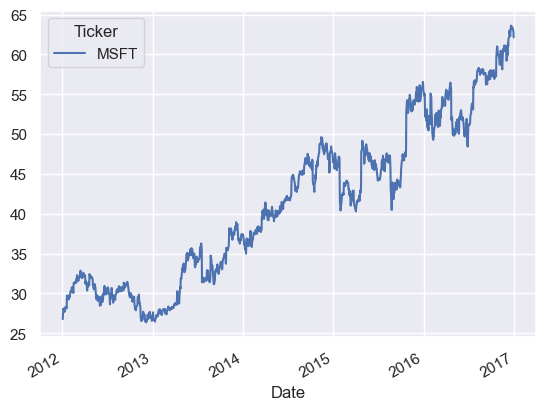

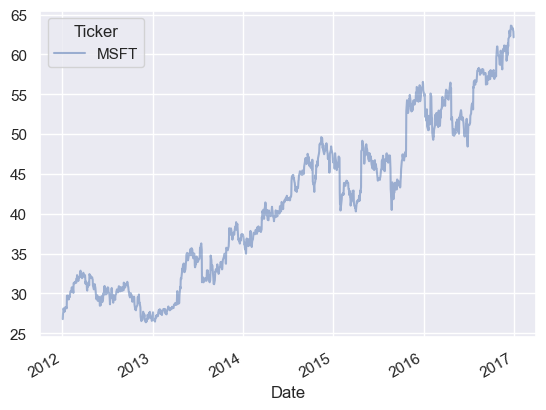

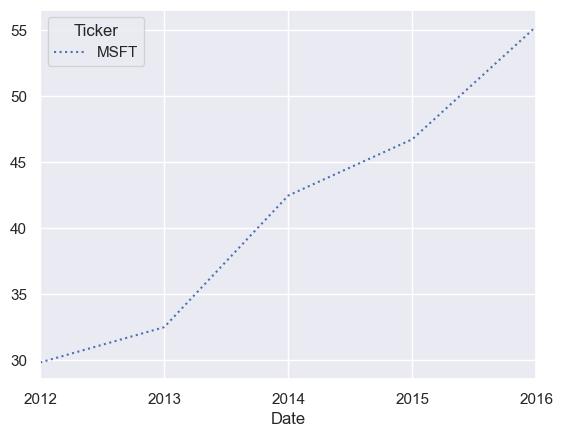

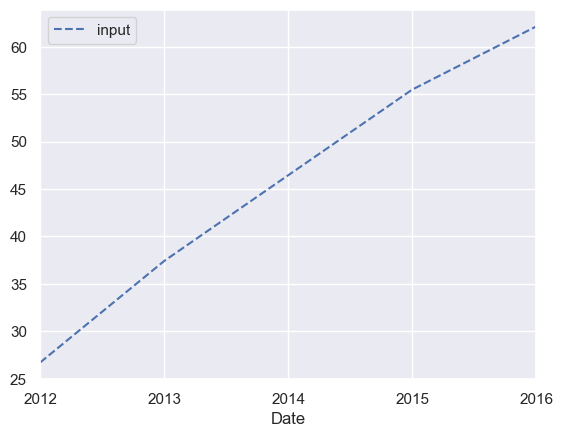

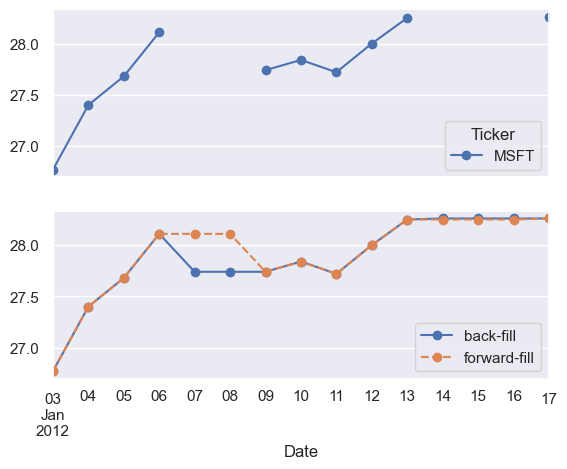

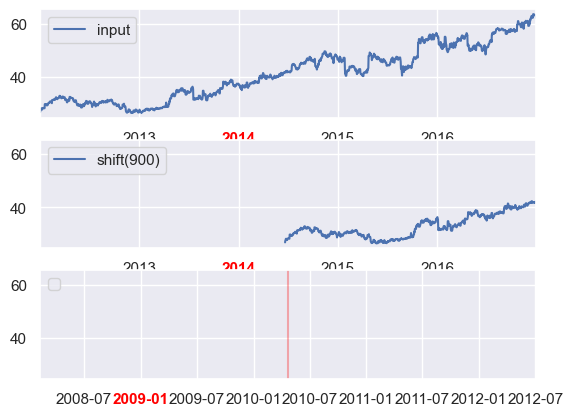

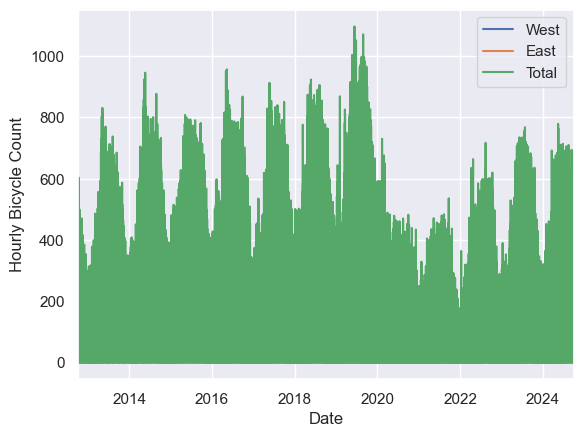

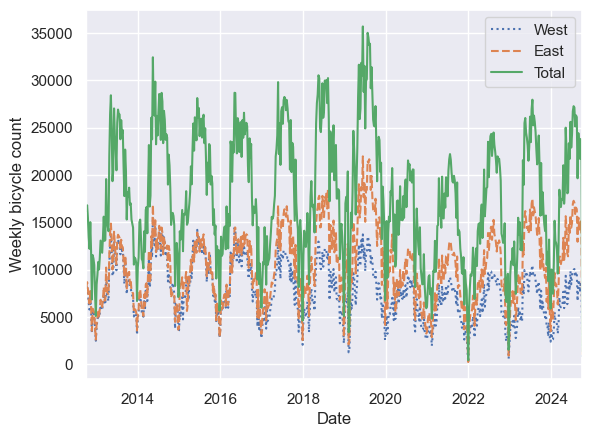

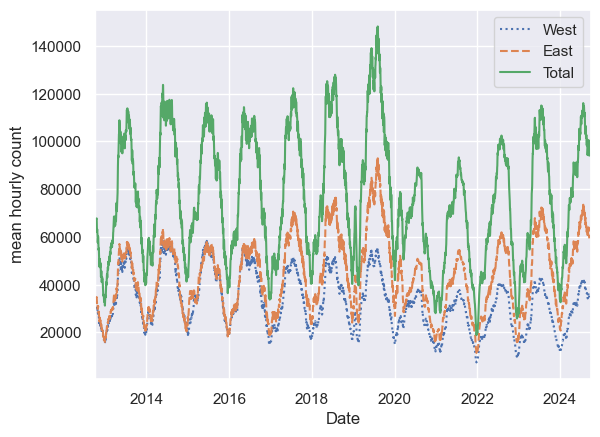

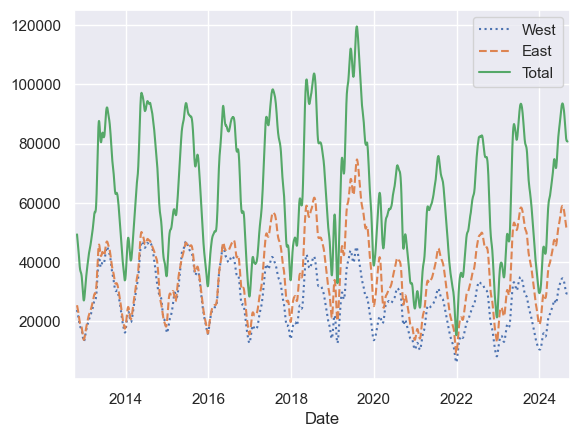

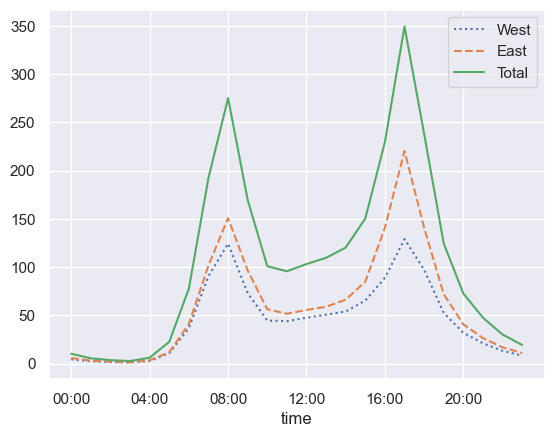

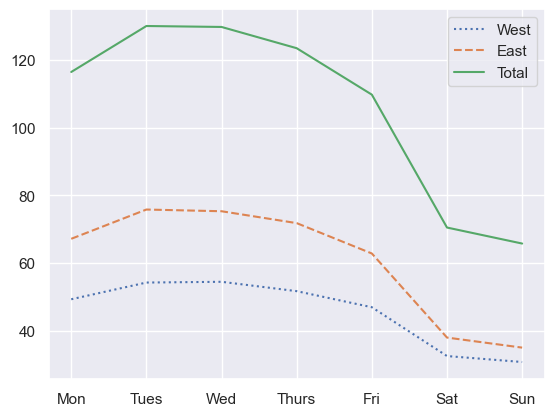

In [31]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

from dateutil import parser
date = parser.parse("4th of July, 2015")
date

date.strftime('%A')

import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

date + np.arange(12)

np.datetime64('2015-07-04')

np.datetime64('2015-07-04 12:00')

np.datetime64('2015-07-04 12:59:59.50', 'ns')

import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

date.strftime('%A')

date + pd.to_timedelta(np.arange(12), 'D')

index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

data['2014-07-04':'2015-07-04']

data['2015']

dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

dates.to_period('D')

dates - dates[0]

pd.date_range('2015-07-03', '2015-07-10')

pd.date_range('2015-07-03', periods=8)

pd.date_range('2015-07-03', periods=8, freq='H')

pd.period_range('2015-07', periods=8, freq='M')

pd.timedelta_range(0, periods=10, freq='H')

pd.timedelta_range(0, periods=9, freq="2H30T")

from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

from pandas_datareader import data

#google no sirve se usa yahoo aunque var se llame google
import yfinance as yf
goog = yf.download('MSFT', start = '2012-01-01', end='2017-01-01')
#goog = data.DataReader('GOOG', start='2004', end='2016',
 #                      data_source='google')
goog.head()

goog = goog['Close']

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

goog.plot();

goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
#goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

#ROI = 100 * (goog.tshift(-365) / goog - 1)
#ROI.plot()
#plt.ylabel('% Return on Investment');

#rolling = goog.rolling(365, center=True)

#data = pd.DataFrame({'input': goog,
#                     'one-year rolling_mean': rolling.mean(),
#                     'one-year rolling_std': rolling.std()})
#ax = data.plot(style=['-', '--', ':'])
#ax.lines[0].set_alpha(0.3)

#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

data.dropna().describe()

%matplotlib inline
import seaborn; seaborn.set()

data.plot()
plt.ylabel('Hourly Bicycle Count');

weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

import matplotlib.pyplot as plt
#fig, ax = plt.subplots(1, 2, figsize=(14, 5))
#by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
#                           xticks=hourly_ticks, style=[':', '--', '-'])
#by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
#                           xticks=hourly_ticks, style=[':', '--', '-']);

## 03.12-Performance-Eval-and-Query

In [32]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
%timeit x + y

%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))

mask = (x > 0.5) & (y < 0.5)

tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

%timeit df1 + df2 + df3 + df4

%timeit pd.eval('df1 + df2 + df3 + df4')

np.allclose(df1 + df2 + df3 + df4,
            pd.eval('df1 + df2 + df3 + df4'))

df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

df.head()

df.eval('D = (A + B) / C', inplace=True)
df.head()

df.eval('D = (A - B) / C', inplace=True)
df.head()

column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

x = df[(df.A < 0.5) & (df.B < 0.5)]

tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

df.values.nbytes

540 μs ± 6.23 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
83.7 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
13.2 ms ± 77.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.84 ms ± 91 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


32000

## 03.13-Further-Resources